# Machine Learning Models

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [66]:
## classification ml:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [67]:
## regression ml
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree.export import export_text
from sklearn.neighbors import KNeighborsRegressor

In [68]:
### evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [69]:
### optimize model
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, FastICA
from sklearn.model_selection import GridSearchCV

In [70]:
ds = pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

In [71]:
#subsets
background = ['PB140: YEAR OF BIRTH','PB150: SEX','PB190: MARITAL STATUS','PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']

education = ['PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED']

work = ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK', 'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION']

health = ['PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']

job= ['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
      "PY090G++: SOCIAL BENEFITS"]
jobdiff=['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']


bneeds= ['PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home']


sat =['PW010: OVERALL LIFE SATISFACTION', 'PW020: MEANING OF LIFE',
       'PW030: SATISFACTION WITH FINANCIAL SITUATION',
       'PW040: SATISFACTION WITH ACCOMMODATION', 'PW050: BEING VERY NERVOUS',
       'PW060: FEELING DOWN IN THE DUMPS', 'PW070: FEELING CALM AND PEACEFUL',
       'PW080: FEELING DOWNHEARTED OR DEPRESSED', 'PW090: BEING HAPPY',
       'PW120: SATISFACTION WITH TIME USE',
       'PW130: TRUST IN THE POLITICAL SYSTEM',
       'PW140: TRUST IN THE LEGAL SYSTEM', 'PW150: TRUST IN THE POLICE',
       'PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS',
       'PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)',
       'PW180: HELP FROM OTHERS', 'PW190: TRUST IN OTHERS',
       'PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS',
       'PW210: SATISFACTION WITH LIVING ENVIRONMENT',
       'PW220: PHYSICAL SECURITY']

subsets= [background,education,work,health,job,bneeds, sat]
columns = []
for x in subsets:
    for y in x:
        columns.append (y)
columns

['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PL150: MANAGERIAL POSITION',
 'PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
 'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
 'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
 'PY090G++: SOCIAL BENEFITS',
 'PD020: Replace worn-out clothes by some new (not second-hand) ones',
 'PD030: Two pairs of properly fitting shoes',
 'PD050: Get-together with friends/fami

In [72]:
ds.head()

,PB030: PERSONAL ID,PB020: COUNTRY,PB010: YEAR OF THE SURVEY,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PE010: CURRENT EDUCATION ACTIVITY,PE040: HIGHEST ISCED LEVEL ATTAINED,...,PW130: TRUST IN THE POLITICAL SYSTEM,PW140: TRUST IN THE LEGAL SYSTEM,PW150: TRUST IN THE POLICE,PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS,PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH),PW180: HELP FROM OTHERS,PW190: TRUST IN OTHERS,PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS,PW210: SATISFACTION WITH LIVING ENVIRONMENT,PW220: PHYSICAL SECURITY
0,35601,DE,2013,1977,1,2.0,3,0,2,3.0,...,3.0,6.0,10.0,8.0,2.0,1.0,-1.0,7.0,8.0,-1.0
1,44701,DE,2013,1936,1,2.0,1,0,2,2.0,...,7.0,4.0,-1.0,8.0,1.0,1.0,8.0,0.0,6.0,2.0
2,59901,DE,2013,1952,2,2.0,3,0,1,5.0,...,3.0,8.0,9.0,10.0,1.0,1.0,-1.0,10.0,6.0,2.0
3,71101,DE,2013,1938,2,2.0,3,0,2,2.0,...,5.0,7.0,5.0,8.0,1.0,-1.0,6.0,9.0,5.0,3.0
4,79501,DE,2013,1950,2,5.0,3,0,2,3.0,...,0.0,2.0,-1.0,2.0,1.0,-1.0,5.0,2.0,10.0,1.0


Load raw datas

In [73]:
### refresh ds
def reload():
    return pd.read_csv("./data/DE_2013p_EUSILC.csv")


    #return pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

In [74]:
data= reload()
data=data.dropna(thresh=len(data)*0.8, axis=1)

data.head()

,PB010,PB020,PB030,PB040,PB100,PB110,PB120,PB140,PB150,PB190,...,PW130,PW140,PW150,PW160,PW170,PW180,PW190,PW200,PW210,PW220
0,2013,DE,35601,3057.583187,2,2013,45,1977,1,2.0,...,3.0,6.0,10.0,8.0,2.0,1.0,NaN,7.0,8.0,NaN
1,2013,DE,44701,3057.583187,3,2013,15,1936,1,2.0,...,7.0,4.0,99.0,8.0,1.0,1.0,8.0,0.0,6.0,2.0
2,2013,DE,59901,3057.583187,2,2013,45,1952,2,2.0,...,3.0,8.0,9.0,10.0,1.0,1.0,NaN,10.0,6.0,2.0
3,2013,DE,71101,3057.583187,2,2013,15,1938,2,2.0,...,5.0,7.0,5.0,8.0,1.0,NaN,6.0,9.0,5.0,3.0
4,2013,DE,79501,3057.583187,2,2013,25,1950,2,5.0,...,0.0,2.0,NaN,2.0,1.0,NaN,5.0,2.0,10.0,1.0


In [75]:
### drop columns because not of interest 

columnstodrop=['PB040', 'PB100',
               'PB110','PB120', 'PB020', "PB220A"]

data.drop(columnstodrop, axis=1, inplace=True)

In [76]:
data.dropna(inplace=True)
### drop to many?

Define X and y

In [77]:
"""
## use raw data
XCol=list(data.columns) ## take all otherwise: columns
outcomelist = 'PW010' ## 'PW010: OVERALL LIFE SATISFACTION'
XCol.remove(outcomelist)
YCol=outcomelist
X = data[XCol]
y= data[YCol]
"""

"\n## use raw data\nXCol=list(data.columns) ## take all otherwise: columns\noutcomelist = 'PW010' ## 'PW010: OVERALL LIFE SATISFACTION'\nXCol.remove(outcomelist)\nYCol=outcomelist\nX = data[XCol]\ny= data[YCol]\n"

PCA /ICA

In [78]:
### use cleanded
data = ds
XCol= columns #
outcomelist = 'PW010: OVERALL LIFE SATISFACTION'
XCol.remove(outcomelist)
YCol=outcomelist
X = data[XCol]
y= data[YCol]

In [79]:
data['PB140: YEAR OF BIRTH']=data['PB140: YEAR OF BIRTH'].apply(lambda x: 2020-x)


In [80]:
data[XCol].head()

,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PE010: CURRENT EDUCATION ACTIVITY,PE040: HIGHEST ISCED LEVEL ATTAINED,PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK,PL051: OCCUPATION (ISCO-08 (COM)),...,PW130: TRUST IN THE POLITICAL SYSTEM,PW140: TRUST IN THE LEGAL SYSTEM,PW150: TRUST IN THE POLICE,PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS,PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH),PW180: HELP FROM OTHERS,PW190: TRUST IN OTHERS,PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS,PW210: SATISFACTION WITH LIVING ENVIRONMENT,PW220: PHYSICAL SECURITY
0,43,1,2.0,3,0,2,3.0,1.0,2,52.0,...,3.0,6.0,10.0,8.0,2.0,1.0,-1.0,7.0,8.0,-1.0
1,84,1,2.0,1,0,2,2.0,7.0,1,62.0,...,7.0,4.0,-1.0,8.0,1.0,1.0,8.0,0.0,6.0,2.0
2,68,2,2.0,3,0,1,5.0,11.0,2,23.0,...,3.0,8.0,9.0,10.0,1.0,1.0,-1.0,10.0,6.0,2.0
3,82,2,2.0,3,0,2,2.0,7.0,1,51.0,...,5.0,7.0,5.0,8.0,1.0,-1.0,6.0,9.0,5.0,3.0
4,70,2,5.0,3,0,2,3.0,1.0,1,44.0,...,0.0,2.0,-1.0,2.0,1.0,-1.0,5.0,2.0,10.0,1.0


In [81]:
# Create a PCA that will retain 99% of variance
pca = PCA(n_components="mle", whiten=True, svd_solver='full')
transformer = FastICA(n_components=7,random_state=0)

# Conduct PCA
features_pca = pca.fit_transform(X)
features_ica =  transformer.fit_transform(X)


In [82]:
features_ica.shape

(19463, 7)

In [83]:
data=pd.DataFrame(features_ica)
data.describe()

,0,1,2,3,4,5,6
count,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04
mean,-8.442238e-18,4.406229e-17,-7.059040e-20,-3.167711e-19,1.863266e-17,2.523557e-19,-1.457616e-17
std,7.168136e-03,7.168136e-03,7.168136e-03,7.168136e-03,7.168136e-03,7.168136e-03,7.168136e-03
min,-1.492278e-02,-2.219250e-02,-1.151247e-02,-6.066908e-04,-1.503075e-01,-3.282613e-03,-4.446149e-02
25%,-4.867294e-03,-6.258929e-03,-5.375307e-03,-4.881013e-04,-8.190526e-04,-3.163062e-03,-2.986116e-03
50%,-1.466615e-03,-5.551411e-04,-2.827963e-03,-4.031143e-04,1.277355e-03,-3.039595e-03,1.350294e-03
75%,4.314570e-03,6.217341e-03,5.375456e-03,-3.374857e-04,3.554372e-03,7.488951e-04,4.000223e-03
max,1.909461e-02,1.428118e-02,1.505049e-02,5.034432e-01,1.103122e-02,3.330572e-01,1.193757e-02


In [84]:
datpa=pd.DataFrame(features_pca)
datpa.describe()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
count,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,...,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04,1.946300e+04
mean,-3.241568e-16,-7.565651e-17,-1.213691e-17,-1.344605e-18,-4.788454e-16,-7.085176e-15,-2.150226e-17,-1.086408e-16,-1.403252e-17,1.324419e-16,...,1.638724e-16,-6.957504e-17,2.956069e-16,2.759286e-16,-1.907624e-16,-1.586929e-16,-1.142837e-16,9.293405e-17,2.981296e-16,3.521249e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.964832e+00,-9.306241e-01,-1.423415e+00,-9.227472e-02,-2.394807e+00,-2.565819e+00,-1.534324e+00,-1.916694e+00,-2.194439e+00,-1.985390e+00,...,-9.744286e-01,-2.165889e+00,-2.115689e+00,-7.739913e-01,-1.341694e+00,-9.102163e-01,-6.019898e-01,-2.344854e+00,-1.572899e+00,-4.625990e-01
25%,-7.131660e-01,-6.400480e-01,-4.408457e-01,-8.743737e-02,-5.045373e-01,-7.511379e-01,-7.506569e-01,-8.062937e-01,-6.103556e-01,-7.284562e-01,...,-7.876100e-01,-9.439097e-01,-8.627968e-01,-3.770494e-01,-5.779003e-01,-5.207266e-01,-3.291940e-01,-4.066425e-01,-4.688027e-01,-2.766800e-01
50%,-4.291571e-01,-2.279236e-01,-4.162489e-01,-7.016229e-02,2.495426e-01,-8.283605e-02,-3.939529e-01,-2.196105e-01,-1.330766e-01,-3.079454e-01,...,-6.655354e-01,2.423249e-01,-3.286381e-01,-2.142832e-01,-4.869560e-01,-4.460302e-01,-2.543947e-01,-3.519362e-01,-2.490030e-01,-2.373290e-01
75%,5.915674e-01,2.854243e-01,1.034547e-01,-3.619530e-02,6.664302e-01,7.686659e-01,7.451892e-01,7.470607e-01,4.990422e-01,4.668119e-01,...,1.267316e+00,8.995661e-01,9.737394e-01,-6.275933e-02,-3.531081e-01,-3.148830e-01,-1.341181e-01,-2.856906e-01,-4.158828e-02,-1.956186e-01
max,5.660268e+00,1.864953e+01,4.645856e+01,7.021641e+01,2.644110e+00,9.495413e+00,2.084891e+00,3.204216e+00,2.566722e+00,2.717839e+00,...,1.625742e+00,4.167793e+00,4.081716e+00,6.844987e+00,2.150568e+00,2.495710e+00,8.665112e+00,2.689034e+00,4.173276e+00,4.313628e+00


create dummies

In [85]:
"""categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]

create_dummy=set(featureslist).intersection(categorical)

data_dummy = pd.get_dummies(data, columns=create_dummy, drop_first=True)
data_dummy.columns
"""

"categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',\n       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',\n       'PE010: CURRENT EDUCATION ACTIVITY',\n       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',\n       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',\n       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',\n        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',\n       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',\n       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',\n       'PD020: Replace worn-out clothes by some new (not second-hand) ones',\n       'PD030: Two pairs of properly fitting shoes',\n       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',\n       'PD060: Regularly participate in a leisure activity',\n       'PD070: Spend a small amount of money each week on yourself',\n       'PD080: Internet connection for personal use at home',\n      ]\n\ncrea

In [86]:
"""# use dummy:
data = data_dummy

# not use dummy:
#data = data =pd.merge(features, outcome, left_index=True, right_index=True)
"""

'# use dummy:\ndata = data_dummy\n\n# not use dummy:\n#data = data =pd.merge(features, outcome, left_index=True, right_index=True)\n'

# 2. Regression

#### <font color=red>here decide how to bin y: </font>

In [87]:
#y_binned=y.apply(lambda x: 0if (x <=5) & (x!=-1) else 1)
#y_binned.unique()

In [88]:
#y_binned.hist()


## 2.2. Scale

#### <font color=red>here decide to scale x or not and if yes which one: </font>

In [89]:
### scaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape


(19463, 45)

In [90]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_minmax = scaler.fit_transform(X)
X_minmax.shape


(19463, 45)

## 2.3 Split

## 2.4 run different models

#### a)  Linear Regression Model

In [91]:
"""
lm = LinearRegression()
model = lm.fit(X_train,y_train)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

y_pred  = lm.predict(X_test)
"""

'\nlm = LinearRegression()\nmodel = lm.fit(X_train,y_train)\n\nprint("Intercept: ", lm.intercept_)\nprint("Coef: ", lm.coef_)\n\ny_pred  = lm.predict(X_test)\n'

In [92]:
#mean_absolute_error(y_test, y_pred)

In [93]:
#mean_squared_error(y_test, y_pred)

In [94]:
#r2_score(y_test, y_pred)

## Split for polynomial

In [95]:
## with features_pca
X_train, X_test, y_train, y_test = train_test_split(features_pca[:,:10], y, test_size=0.2)

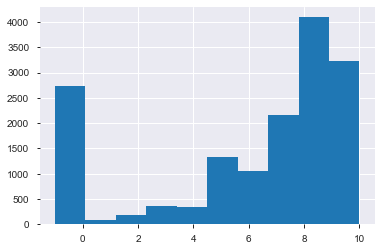

In [96]:
y_train.hist()

#### c)  Taylor (pipeline)

In [97]:
"""for k in range(1,7):
    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=k), LinearRegression())# include_bias = False, interaction_only = True
    model = poly_model.fit(X_train, y_train)
    
    
    #print(poly_model.score(X_test, y_test))

    y_pred  = poly_model.predict(X_test)
    print(k, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))
"""

'for k in range(1,7):\n    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=k), LinearRegression())# include_bias = False, interaction_only = True\n    model = poly_model.fit(X_train, y_train)\n    \n    \n    #print(poly_model.score(X_test, y_test))\n\n    y_pred  = poly_model.predict(X_test)\n    print(k, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))\n'

In [98]:
"""
Result with features pca all
1 12.639222470953477 -0.004191237106780044
2 13.596191359963083 -0.0802227948023353
...

Result with 20 columns of the pca
1 12.691280289024979 0.0005084332200716579
2 12.847189383387747 -0.011770062049994978
3 740.225607485154 -57.295872074920545
...

Result with 10 columns of the pca
1 12.79045153818512 -0.0007991417943655765
2 12.835876597887085 -0.004353462033175326
3 13.669013797103895 -0.0695429505734253
4 2918698854143.3833 -228375933378.8603
5 1.8400454397274128e+17 -1.4397583161502128e+16
"""

'\nResult with features pca all\n1 12.639222470953477 -0.004191237106780044\n2 13.596191359963083 -0.0802227948023353\n...\n\nResult with 20 columns of the pca\n1 12.691280289024979 0.0005084332200716579\n2 12.847189383387747 -0.011770062049994978\n3 740.225607485154 -57.295872074920545\n...\n\nResult with 10 columns of the pca\n1 12.79045153818512 -0.0007991417943655765\n2 12.835876597887085 -0.004353462033175326\n3 13.669013797103895 -0.0695429505734253\n4 2918698854143.3833 -228375933378.8603\n5 1.8400454397274128e+17 -1.4397583161502128e+16\n'

In [99]:
mean_absolute_error(y_test, y_pred)

5.722578987927048

In [100]:
mean_squared_error(y_test, y_pred)

39.44669920369895

In [101]:
r2_score(y_test, y_pred)

-2.084028860693102

#### c)  Regression Tree

In [102]:
regr = DecisionTreeRegressor(random_state = 29)

model = regr.fit(X_train, y_train)

y_pred  = regr.predict(X_test)
regr.score(X_test, y_test)

-0.9744564647637044

In [103]:
#r = export_text(regr, feature_names=list(X.columns))
#print(r)

In [104]:
mean_absolute_error(y_test, y_pred)

3.7677883380426405

In [105]:
mean_squared_error(y_test, y_pred)

25.25455946570768

In [106]:
r2_score(y_test, y_pred)


-0.9744564647637044

In the rare cases you get a negative r squared value, you should probably rethink your regression analysis, especially if you are forcing an intercept.

#### d)  KNeighborsRegressor

In [107]:
knnr = KNeighborsRegressor(n_neighbors = 3)

model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)


In [108]:
mean_absolute_error(y_test, y_pred)

3.262265604931929

In [109]:
mean_squared_error(y_test, y_pred)

17.11567771213289

In [110]:
r2_score(y_test, y_pred)

-0.3381409623644711

# 3. optimize recursive feature elimination (RFE)

In [111]:
## recursive feature elimination.
# initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

Fit the model and print the ranking

In [112]:
"""auto_model = LinearRegression()
selector = RFE(auto_model, 5, step=1)
model = selector.fit(X_test,y_test)


selector.ranking_
#selector.support_"""

'auto_model = LinearRegression()\nselector = RFE(auto_model, 5, step=1)\nmodel = selector.fit(X_test,y_test)\n\n\nselector.ranking_\n#selector.support_'

In [113]:
"""rfe_col = []
for x in range(len(X.columns)):
    if selector.ranking_[x]<=10:
        rfe_col.append(X.columns[x])
print(len(rfe_col))
rfe_col"""

'rfe_col = []\nfor x in range(len(X.columns)):\n    if selector.ranking_[x]<=10:\n        rfe_col.append(X.columns[x])\nprint(len(rfe_col))\nrfe_col'

## 2. Classification

### 2.1.1 prepare data

In [114]:
"""
### use raw data
XCol=list(data.columns) ## take all otherwise: columns
outcomelist = 'PW010' ## 
XCol.remove(outcomelist)
YCol=outcomelist
"""

"\n### use raw data\nXCol=list(data.columns) ## take all otherwise: columns\noutcomelist = 'PW010' ## \nXCol.remove(outcomelist)\nYCol=outcomelist\n"

In [115]:
## with features_ica
#X =data[XCol]
#y= data[YCol]

In [117]:

### use cleanded
data = ds
XCol= columns #
outcomelist = 'PW010: OVERALL LIFE SATISFACTION'
#XCol.remove(outcomelist)
YCol=outcomelist
X = data[XCol]
y= data[YCol]


In [118]:
## binning
data['Y_class']= data[YCol].apply(lambda x: 1 if x>5 else 0)

1    0.674459
0    0.325541
Name: Y_class, dtype: float64


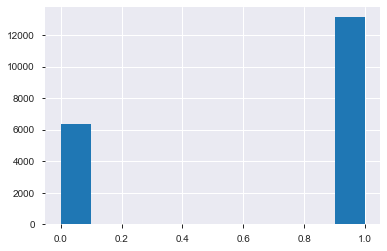

In [141]:
data['Y_class'].hist()
print(data['Y_class'].value_counts(normalize=True))
y=data['Y_class']
## --> balanced?

In [120]:
print(len(XCol))
print(YCol)

45
PW010: OVERALL LIFE SATISFACTION


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape


(15570, 45)

#### a) Logistic Regression

In [122]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [123]:
acc = lr.score(X_test,y_test)
acc

0.6660673002825584

In [124]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

#tn,fp,fn,tp = confusion_matrix(y_test, y_pred).flatten()
### it predicts all as 1...

accuracy: 66.61
precision: nan


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.


array([[   0, 1300],
       [   0, 2593]], dtype=int64)

#### b) DecisionTree Classify

In [125]:
dtc = DecisionTreeClassifier(class_weight= 'balanced', max_features= 29, splitter= 'best')#class_weight='balanced'max_features= 10, 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
print( "recall: " +str(round((conf[1,1])/ (conf[0,1]+conf[1,1])*100,2)))
conf

accuracy: 56.95
precision: 35.29
recall: 67.53


array([[ 451,  849],
       [ 827, 1766]], dtype=int64)

In [136]:

param_grid={'splitter': ['best','random'], 'class_weight': ["balanced"], 'max_features': range(1,30)}
dtc = DecisionTreeClassifier()
dtc_cv = GridSearchCV(dtc, param_grid, scoring='accuracy',  cv=7,  n_jobs=-1)#eed = True,
dtc_cv.fit(X_train, y_train)
dtc_cv.best_params_

{'class_weight': 'balanced', 'max_features': 6, 'splitter': 'best'}

In [138]:
dtc = DecisionTreeClassifier(class_weight='balanced' ,max_features= 6, splitter= 'best')#class_weight='balanced'max_features= 10, 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
print( "recall: " +str(round((conf[1,1])/ (conf[0,1]+conf[1,1])*100,2)))
conf

accuracy: 55.59
precision: 33.41
recall: 66.62


array([[ 432,  868],
       [ 861, 1732]], dtype=int64)

In [ ]:
## try with pca

In [50]:
#data = ds
outcomelist = 'PW010: OVERALL LIFE SATISFACTION'
X = features_pca
y= data[YCol]

In [51]:
## binning
data['Y_class']= data[YCol].apply(lambda x: 1 if x>5 else 0)
y=data['Y_class']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

(15570, 44)

In [53]:
dtc = DecisionTreeClassifier(class_weight= 'balanced', max_features= 29, splitter= 'best')#class_weight='balanced'max_features= 10, 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test, y_pred)
print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
print( "recall: " +str(round((conf[1,1])/ (conf[0,1]+conf[1,1])*100,2)))
conf

accuracy: 55.07
precision: 30.78
recall: 66.97


array([[ 394,  863],
       [ 886, 1750]], dtype=int64)

In [54]:
param_grid={'splitter': ['best','random'], 'class_weight': ["balanced"], 'max_features': range(4,30)}
dtc = DecisionTreeClassifier()
dtc_cv = GridSearchCV(dtc, param_grid)
dtc_cv.fit(X_train, y_train)
dtc_cv.best_params_

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'class_weight': 'balanced', 'max_features': 12, 'splitter': 'best'}

#### c) Support Vector Maschine

In [359]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [291]:
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

SVM Algorithm Test Accuracy 79.48%


In [292]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
conf

accuracy: 79.48
precision: 79.48


array([[3094,    0],
       [ 799,    0]], dtype=int64)

#### d) K-Nearest Neighbour

In [360]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [361]:
acc = knn.score(X_test, y_test)*100
acc

76.75314667351657

In [362]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
conf

accuracy: 76.75
precision: 79.09


array([[2951,  125],
       [ 780,   37]], dtype=int64)

Process	(backup)

•	Simbalance checking (undersampling, oversamplingML umbalanced data lib)

•	Split --> X_tr, y_tr, / X_ts,  y_ts

•	Try few models (with different algorithms) (<-- pipeline)

    –	Initialization

    –	Fit / predict

    –	Evaluation (overfitting / underfitting)

•	Choose best option based on requirements

•	Optimize the model

    –	Cross -validation

    –	Try few models (with same way to approach problem)

        o	Init

        o	Fit.(predict)

        o	Evaluation

    –	Hpyertuning


##### Optimize Model

In [ ]:
#### b) DecisionTree Classify

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")

conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

In [ ]:
"""
# example for KNN
param_grid = {'n_neighbors': np.arange(1,15)} 
knn = neighbors.KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)
knn_cv.best_params_
"""

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'class_weight': 'balanced'}